In [1]:
import pandas as pd
import yfinance as yf

# Get list of S&P 500 ticker symbols
# get current tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Download stock data for each symbol
sp500_data = yf.download(sp500_tickers, period='5d', interval='1d', group_by='ticker')


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: Period '5d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']


In [8]:

# Print the Close prices for the past 5 days for each stock
# print(sp500_data['Close'])
# get the tickers for the stocks
tickers = sp500_data.columns.levels[0].tolist()
tickers

['A',
 'AAL',
 'AAP',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLK',
 'BMY',
 'BR',
 'BRK.B',
 'BRO',
 'BSX',
 'BWA',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTLT',
 'CTR

In [9]:
import tweepy

# Set up Twitter API credentials

auth = tweepy.OAuthHandler(client_id, client_secret)
auth.set_access_token(access_token, access_token_secret)


In [64]:
import requests
from textblob import TextBlob


# Set up the search query
query = 'AAPL lang:en'

# Set up the API endpoint and headers
url = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'Authorization': f'Bearer {bearer_token}'}

# Set up the request parameters
params = {'query': query, 'max_results': 100}

# Send the request to the API
response = requests.get(url, headers=headers, params=params)

# Print the entire JSON response
print(response.json())

# Extract the tweets from the response
tweets = response.json()['data']

# Print the text of each tweet
for tweet in tweets:
    tweet = tweet['text']
    # print(tweet)
    
# Create a TextBlob object
blob = TextBlob(tweet)

# Get the sentiment score (-1 to 1)
polarity_score = blob.sentiment.polarity
sentiment_score = blob.sentiment.subjectivity

# Print the sentiment score
# print(sentiment_score )


{'data': [{'edit_history_tweet_ids': ['1638064645389836288'], 'id': '1638064645389836288', 'text': 'Make profits with us click here to join \nhttps://t.co/DmyHFfcMZw\n\n$STNG $GOLD $RCL $AAL $NET $AAPL $NKLA $MGM $MCRB $WYNN $LCA $CGC $OMER $MELI $BTC.X $OXY $HCAC $INO $KODK  $SLV $OMER $PENN $SOHU $OSTK $FENC $SPY $QQQ $AMZN $NVDA $BA $TSLA $BABA $AMD $AAPL $NFLX $TWTR $AAL https://t.co/HdlcM9o0L0'}, {'edit_history_tweet_ids': ['1638064626637127680'], 'id': '1638064626637127680', 'text': 'Alerts before spikes and right as big news drops \nFree discord chatroom \nhttps://t.co/bbbK2tIy5e\n\n$ACHV $SONN $ZN $COCP $HBP $KODK $OPTI $AAPL $SPY $PINS $CHFS $FB $USO $MSFT $HTGM $CHGG $BIOC $KSI $BYOC $XSPA $IZEA $NKLA $ZOM $VISL $ADT $VSTM $ATVI $BYND $OCGN $MARK $MARA https://t.co/ofQj8psCvO'}, {'edit_history_tweet_ids': ['1638064564104306689'], 'id': '1638064564104306689', 'text': 'GET STOCKS &amp; OPTIONS ALERTS in our community join here https://t.co/DmyHFfcMZw\n\n$NIO $BYND $USEG $SHOP $

In [52]:
import requests
from textblob import TextBlob

# create a dataframe to store the sentiment scores and the ticker and the text
df = pd.DataFrame(columns=['ticker', 'polarity_score', 'sentiment_score', 'text'])
tickers = ['AAPL', 'MSFT', 'ZION']

for ticker in tickers:
    
    query = f'{ticker} lang:en'
    
    url = 'https://api.twitter.com/2/tweets/search/recent'
    headers = {'Authorization': f'Bearer {bearer_token}'}
    
    params = {'query': query, 'max_results': 100}
    response = requests.get(url, headers=headers, params=params)
    tweets = response.json()['data']
    
    for tweet in tweets:
        tweet = tweet['text']
        blob = TextBlob(tweet)
        polarity_score = blob.sentiment.polarity
        sentiment_score = blob.sentiment.subjectivity
        # df['sentiment_score'] = sentiment_score
        # df['text'] = tweet
        df.loc[len(df)] = [ticker, polarity_score, sentiment_score, tweet]
        # print(f'{ticker} {sentiment_score}')

In [53]:
df

,ticker,polarity_score,sentiment_score,text
0,AAPL,0.000000,0.000000,"learn trading, get alerts, ideas, updates, ana..."
1,AAPL,0.000000,1.000000,Only in our Discord!! No body does it like us...
2,AAPL,0.433333,0.500000,Thanks for the alert &amp; updates\nBest analy...
3,AAPL,0.750000,0.550000,Best stock trade Group out there! \nFree chatr...
4,AAPL,0.000000,0.000000,Check out our subscriber alerts in our discord...
...,...,...,...,...
294,ZION,-0.291667,0.541667,"RT @Beatlove91: On the lowest of keys, Mount Z..."
295,ZION,0.250000,0.250000,$zion *Top analyst price target for next week...
296,ZION,1.000000,1.000000,*Things people don't know they are saying* \nP...
297,ZION,1.000000,1.000000,Awesome community @ZION_JPN_ @00wamsan @nocchi...


In [54]:
# average the sentiment score for each ticker
data = df.groupby('ticker').mean()
# reset the header
data = data.reset_index()
data

,ticker,polarity_score,sentiment_score
0,AAPL,0.249536,0.374319
1,MSFT,0.200719,0.380309
2,ZION,0.159636,0.388200


In [55]:
# add a column to the dataframe to store the 5-day return
data['five_day_return'] = 0
for ticker in tickers:
    # Calculate the 5-day return for the ticker
    stock_data = sp500_data[ticker]['Close']
    five_day_return = (stock_data.iloc[-1] - stock_data.iloc[0]) / stock_data.iloc[0]
    # append the 5-day return to the dataframe
    data.loc[data['ticker'] == ticker, 'five_day_return'] = five_day_return

In [56]:
data

,ticker,polarity_score,sentiment_score,five_day_return
0,AAPL,0.249536,0.374319,0.031522
1,MSFT,0.200719,0.380309,0.043867
2,ZION,0.159636,0.388200,-0.036091


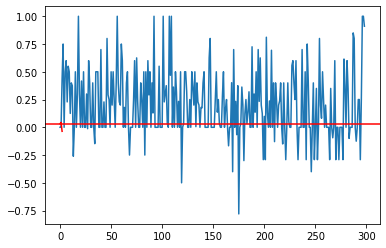

In [61]:
# plot porality score from the dataframe df
import matplotlib.pyplot as plt
plt.plot(df['polarity_score'])
# plot line at 5-day return
plt.axhline(data['five_day_return'][0], color='red')
plt.plot(data['five_day_return'], color='red')

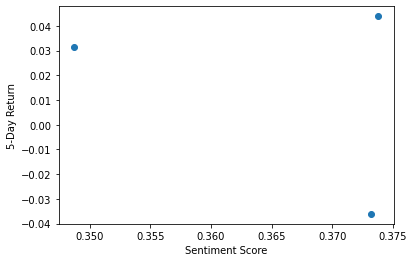

In [42]:
# plot the sentiment score vs the 5-day return
import matplotlib.pyplot as plt
plt.scatter(data['sentiment_score'], data['five_day_return'])
plt.xlabel('Sentiment Score')
plt.ylabel('5-Day Return')
plt.show()

In [10]:
# Set up the API endpoint and headers
url = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'Authorization': f'Bearer {bearer_token}'}

# Loop over the tickers
for ticker in tickers:
    # Set up the search query
    query = f'${ticker} OR {ticker} Corp OR {ticker} Inc lang:en'
    params['query'] = query

    # Send the request to the API
    response = requests.get(url, headers=headers, params=params)

    # Extract the tweets from the response
    tweets = response.json()['data']

    # Calculate the average sentiment score for the tweets
    total_score = 0
    count = 0
    for tweet in tweets:
        text = tweet['text']
        blob = TextBlob(text)
        sentiment_score = blob.sentiment.polarity
        total_score += sentiment_score
        count += 1
    if count > 0:
        avg_score = total_score / count
    else:
        avg_score = None

    # Print the ticker and average sentiment score
    print(f'{ticker}: {avg_score}')


KeyError: 'data'

In [11]:
import requests
from textblob import TextBlob

# Set up the search query
query = 'AAPL lang:en'

# Set up the API endpoint and headers
url = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'Authorization': f'Bearer {bearer_token}'}

# Set up the request parameters
params = {'query': query, 'max_results': 100}

# Send the request to the API
response = requests.get(url, headers=headers, params=params)

# Check if the response contains an error message
if response.status_code != 200:
    print(f'Error: {response.json()["errors"][0]["message"]}')
else:
    # Extract the tweets from the response
    if 'data' in response.json():
        tweets = response.json()['data']

        # Calculate the average sentiment score for the tweets
        total_sentiment_score = 0
        for tweet in tweets:
            text = tweet['text']
            blob = TextBlob(text)
            sentiment_score = blob.sentiment.polarity
            total_sentiment_score += sentiment_score
        avg_sentiment_score = total_sentiment_score / len(tweets)
        print(f'Average sentiment score for {query}: {avg_sentiment_score:.2f}')
    else:
        print(f'No tweets found for {query}')
        


Average sentiment score for AAPL lang:en: 0.25


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Split data into X and y
X = data[['Sentiment_Score']]
y = data['Returns']

# Add intercept term to X
X = sm.add_constant(X)

# Create linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())

In [ ]:

# Split data into X and y
X = data[['Sentiment_Score']]
y = data['Returns']

# Add intercept term to X
X = sm.add_constant(X)

# Create linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the regression summary
print(results.summary())

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 48] Address already in use

In [13]:
import pandas as pd
import requests

# Download the list of S&P 500 tickers
url = 'https://www.spglobal.com/spdji/en/indices/equity/sp-500/download'
r = requests.get(url)
tickers = r.text.split('\n')[1:-1]

# Create a DataFrame with the tickers
sp500_df = pd.DataFrame({'Symbol': tickers})

# Save the DataFrame as a CSV file
sp500_df.to_csv('SP500_Tickers.csv', index=False)


In [ ]:
import tweepy
import pandas as pd

consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

tickers = pd.read_csv('SP500_Tickers.csv') # read in S&P 500 tickers
tweets = pd.DataFrame() # create empty dataframe for tweets

for ticker in tickers['Symbol']:
    try:
        query = ticker + ' -filter:retweets' # exclude retweets from query
        tweets_data = api.search(q=query, lang='en', count=100, tweet_mode='extended')
        for tweet in tweets_data:
            tweets = tweets.append({
                'Ticker': ticker,
                'Tweet': tweet.full_text,
                'Date': tweet.created_at
            }, ignore_index=True)
    except:
        print('Error downloading tweets for ticker:', ticker)

tweets.to_csv('SP500_Tweets.csv', index=False) # save tweets to csv file
